# PROJECT BY:

### MOHAN KUMAR M (KNS INSTITUTE OF TECHNOLOGY , 7204451235, mohankumargowda137@gmail.com) 
### DARSHAN V(KNS INSTITUTE OF TECHNOLOGY, 9886551082, darshananimus@gmail.com)
### MAHESH C(KNS INSTITUTE OF TECHNOLOGY, 9739131441, maheshchakri42@gmail.com)

# OBJECTIVE :
### To build a machine learning model to predict telecom churn



# TELECOM CHURN:


Telecom churn, also known as telecom attrition, telecom turnover, or telecom defection, is the loss of clients or customers.

Telephone service companies, Internet service providers, pay TV companies, insurance firms, and alarm monitoring services, often use customer attrition analysis and customer attrition rates as one of their key business metrics because the cost of retaining an existing customer is far less than acquiring a new one. Companies from these sectors often have customer service branches which attempt to win back defecting clients, because recovered long-term customers can be worth much more to a company than newly recruited clients.

Companies usually make a distinction between voluntary churn and involuntary churn. Voluntary churn occurs due to a decision by the customer to switch to another company or service provider, involuntary churn occurs due to circumstances such as a customer's relocation to a long-term care facility, death, or the relocation to a distant location. In most applications, involuntary reasons for churn are excluded from the analytical models. Analysts tend to concentrate on voluntary churn, because it typically occurs due to factors of the company-customer relationship which companies control, such as how billing interactions are handled or how after-sales help is provided.

predictive analytics use churn prediction models that predict customer churn by assessing their propensity of risk to churn. Since these models generate a small prioritized list of potential defectors, they are effective at focusing customer retention marketing programs on the subset of the customer base who are most vulnerable to churn.

# importing various packages required for reading and processing data for the purpose of EDA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Reading the file containing churn data

In [2]:
df=pd.read_csv("Telco-Customer-Churn.csv")

### Dimensions of the dataset

In [133]:
df.shape

(7043, 21)

### Checking number of data entries in each column

In [3]:
df.count()

customerID          7043
gender              7043
SeniorCitizen       7043
Partner             7043
Dependents          7043
tenure              7043
PhoneService        7043
MultipleLines       7043
InternetService     7043
OnlineSecurity      7043
OnlineBackup        7043
DeviceProtection    7043
TechSupport         7043
StreamingTV         7043
StreamingMovies     7043
Contract            7043
PaperlessBilling    7043
PaymentMethod       7043
MonthlyCharges      7043
TotalCharges        7043
Churn               7043
dtype: int64

### Getting information about datatype and number of entries in each column

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

### Printing out first 5 rows of data

In [5]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### Checking for number of null entries in each column

In [6]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

### Checking to what extent data may be biased

In [7]:
df['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

### Seperating other variables from target variable

In [8]:
x=df.drop('Churn',axis=1)
x.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65


### Seperating target variables from other variable

In [9]:
y=df['Churn']
y.head()

0     No
1     No
2    Yes
3     No
4    Yes
Name: Churn, dtype: object

## Since the given data contains objects type of data, it must be converted to numeric value so as to find outliers easily using boxplot and replace them with suitable values

### We use labelencoder from sklearn library for encoding

In [10]:
from sklearn.preprocessing import LabelEncoder

#### We create a object of labelencoder and use it fit and transform x

In [11]:
le=LabelEncoder()
x=x.apply(le.fit_transform)

#### The table after performing encoding

In [12]:
x.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,5375,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,142,2505
1,3962,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,498,1466
2,2564,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,436,157
3,5535,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,266,1400
4,6511,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,729,925


# After encoding we should find outliers using boxplot

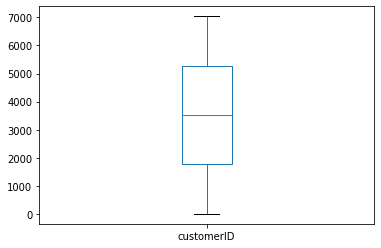

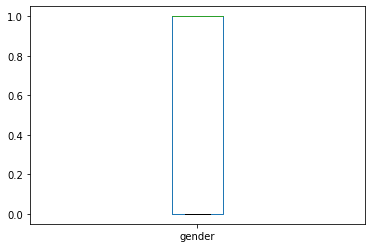

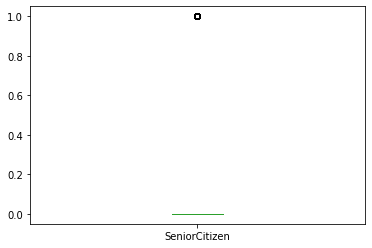

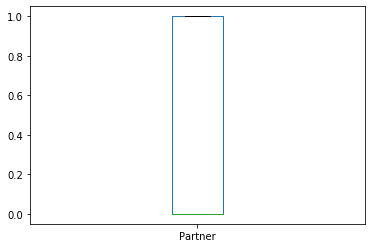

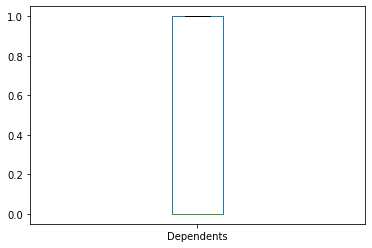

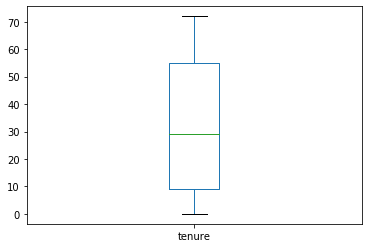

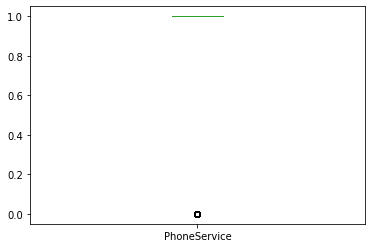

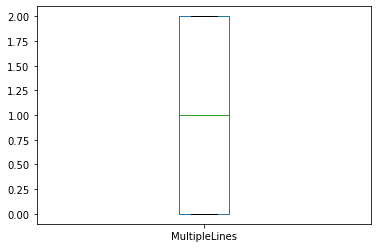

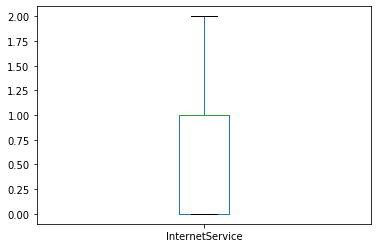

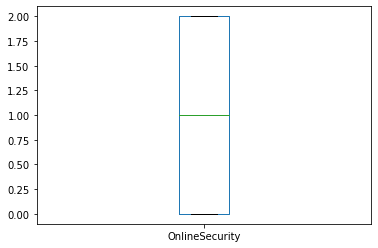

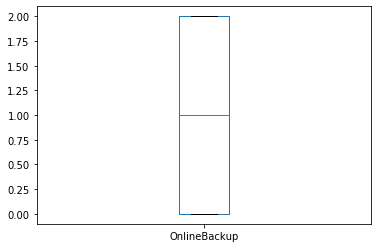

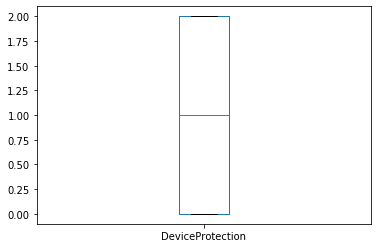

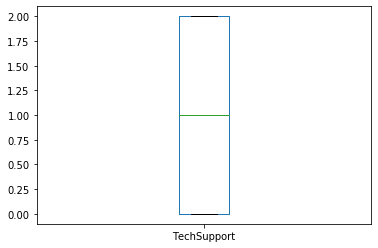

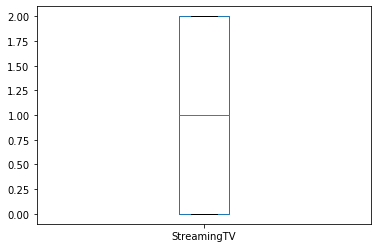

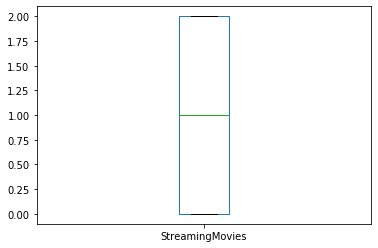

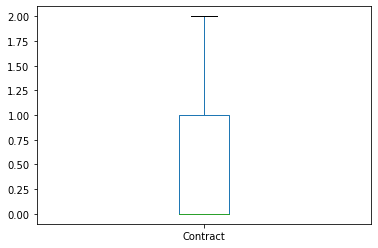

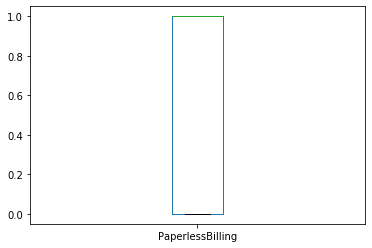

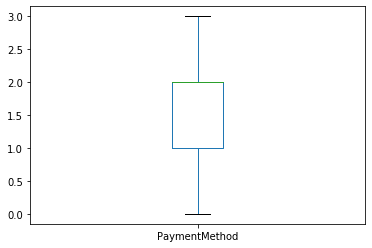

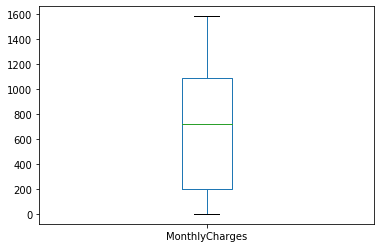

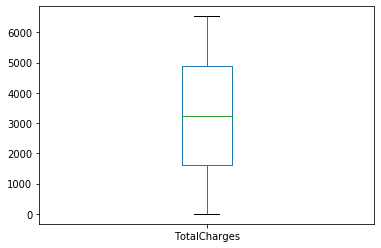

In [13]:
for i in x.columns:
    x[i].plot.box()
    plt.show()

# Since there are no outliers in the data,we continue to build the model

### Before building any model we should split data into training and testing data

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=12)

# After splitting data we need to build the model

### This problem is identified as classification problem hence we use Logistic Regression as its a binary classification problem

In [16]:
from sklearn.linear_model import LogisticRegression

In [17]:
lr=LogisticRegression(max_iter=1000)
lr.fit(x_train,y_train)

C:\Users\mohan\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [18]:
lr.score(x_test,y_test)

0.8005677785663591

In [19]:
y_pred=lr.predict(x_test)

In [20]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [21]:
confusion_matrix(y_test,y_pred)

array([[933, 110],
       [171, 195]], dtype=int64)

In [22]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

          No       0.85      0.89      0.87      1043
         Yes       0.64      0.53      0.58       366

    accuracy                           0.80      1409
   macro avg       0.74      0.71      0.73      1409
weighted avg       0.79      0.80      0.79      1409



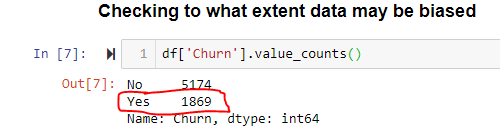

### Due to biased data we get less accuracy for Yes

In [23]:
#pending part is scaling data and using k-fold and stratified

# Scaling data using minmax scaler

In [24]:
from sklearn.preprocessing import MinMaxScaler

In [34]:
scaler1=MinMaxScaler()
x1=df.drop('Churn',axis=1)
y1=df['Churn']

In [40]:
le=LabelEncoder()
x1=x1.apply(le.fit_transform)
x1.head()
scaler1.fit(x1)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [42]:
x1=scaler1.transform(x1)

In [47]:
x1_train,x1_test,y1_train,y1_test=train_test_split(x1,y1,test_size=0.2,random_state=42)

In [48]:
lr=LogisticRegression(max_iter=1000)
lr.fit(x1_train,y1_train)

C:\Users\mohan\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [49]:
lr.score(x1_test,y1_test)

0.8126330731014905

In [50]:
y1_pred=lr.predict(x1_test)

In [51]:
confusion_matrix(y1_test,y1_pred)

array([[936, 100],
       [164, 209]], dtype=int64)

In [53]:
print(classification_report(y1_test,y1_pred))

              precision    recall  f1-score   support

          No       0.85      0.90      0.88      1036
         Yes       0.68      0.56      0.61       373

    accuracy                           0.81      1409
   macro avg       0.76      0.73      0.74      1409
weighted avg       0.80      0.81      0.81      1409



## on scaling data we can see that  accuracy of the model has improved




































### using stratify to balance the biased data

In [126]:
x2_train,x2_test,y2_train,y2_test=train_test_split(x1,y1,test_size=0.2,stratify=y1)

In [127]:
lr.fit(x2_train,y2_train)

C:\Users\mohan\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [128]:
lr.score(x2_test,y2_test)

0.8183108587650816

In [129]:
y2_pred=lr.predict(x2_test)

In [130]:
confusion_matrix(y2_test,y2_pred)

array([[942,  93],
       [163, 211]], dtype=int64)

In [131]:
print(classification_report(y1_test,y1_pred))

              precision    recall  f1-score   support

          No       0.85      0.90      0.88      1036
         Yes       0.68      0.56      0.61       373

    accuracy                           0.81      1409
   macro avg       0.76      0.73      0.74      1409
weighted avg       0.80      0.81      0.81      1409



# OVERALL ACCURACY OF THE MODEL AFTER FINE TUNING TURNS OUT TO BE 81%

# FUTURE SCOPE

----> The model can be trained better with balanced data, so we should encorporate various methods to produce accuracy that  can be produced with balanced data

---->The future scope of this project will use hybrid classification techniques to point out existing association between  churn prediction and customer lifetime value. The retention policies need to be considered by selecting appropriate  variables from the dataset. The passive and the dynamic nature of the industry ensure that data mining has become increasingly significant aspect in the telecommunication industry prospect. 